In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import  MLPRegressor
import csv
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [11]:
data = pd.read_pickle('masterPitchDataFrame.pkl')

print data.head(4)
print data.shape

print data.describe()

  chorus_num  year  rank  min pitch     max pitch  semitones         1  \
0         t1  2000     1  49.165565  10077.427734     92.151  0.070130   
0         t2  2000     1  44.419090  12372.230469     97.461  0.069854   
0         t1  2000     2  43.066406   5694.838379     84.563  0.062742   
0         t2  2000     2  54.388142   7689.414062     85.721  0.066394   

          2         3         4    ...           25        26        27  \
0  0.025290  3.211492  0.154289    ...     0.011053  0.018358  0.011353   
0  0.026899  3.197358  0.155465    ...     0.012898  0.018481  0.013359   
0  0.068079  3.124742  0.136561    ...     0.013276  0.022236  0.017319   
0  0.078450  3.154230  0.136204    ...     0.013709  0.020353  0.015735   

         28        29        30        31        32        33        34  
0  0.081244  0.002043  0.004497  0.009091  0.039288  0.008888  0.031881  
0  0.079581  0.002126  0.004041  0.009565  0.039752  0.007371  0.032283  
0  0.031146  0.005512  0.006156

In [2]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['chorus_num_code'] = encoder.fit_transform(data['chorus_num'])
#print data[['chorus_num',"chorus_num_code"]].head()

data['year_code'] = encoder.fit_transform(data['year'])
#print data[['year',"year_code"]].head(200)

In [23]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ["rank","chorus_num","year"]]
print data.columns


y = data["rank"]#.astype(float)
x = data[columns]#.astype(float)
#print x
seed = 7

Index([u'chorus_num', u'year', u'rank', u'min pitch', u'max pitch',
       u'semitones', u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8', u'9',
       u'10', u'11', u'12', u'13', u'14', u'15', u'16', u'17', u'18', u'19',
       u'20', u'21', u'22', u'23', u'24', u'25', u'26', u'27', u'28', u'29',
       u'30', u'31', u'32', u'33', u'34', u'chorus_num_code', u'year_code'],
      dtype='object')
              rank    min pitch      max pitch    semitones            1  \
count  1116.000000  1116.000000    1116.000000  1116.000000  1116.000000   
mean     50.111111    49.252653    9566.066164    89.283065     0.065711   
std      28.953561     8.484090    6347.284066     9.841724     0.022721   
min       1.000000    43.066406     526.556213    32.659000     0.018444   
25%      25.000000    43.203750    6427.135376    84.527000     0.050570   
50%      50.000000    46.875000    9232.619141    91.191000     0.062884   
75%      75.000000    51.940618   11790.467285    95.977750     0.077887

In [24]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [25]:
#print type(target)
# evaluate each model in turn
data = data.reindex()
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.002679 (0.005717)
LDA: 0.008036 (0.009322)
KNN: 0.008969 (0.008993)
CART: 0.008977 (0.008977)
NB: 0.003596 (0.004404)
SVM: 0.000893 (0.002679)


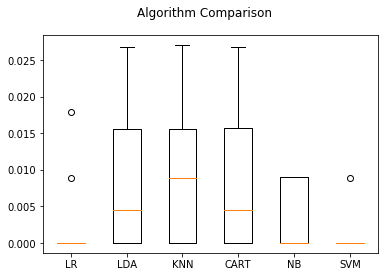

In [68]:
import matplotlib.pyplot as plt
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()